![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [92]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [93]:
tweets.at[570301031407624196,'text']

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [103]:
# Impresión tamaño del cojunto de datos
tweets.shape
tweets.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

### Análisis descriptivo

In [95]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [96]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

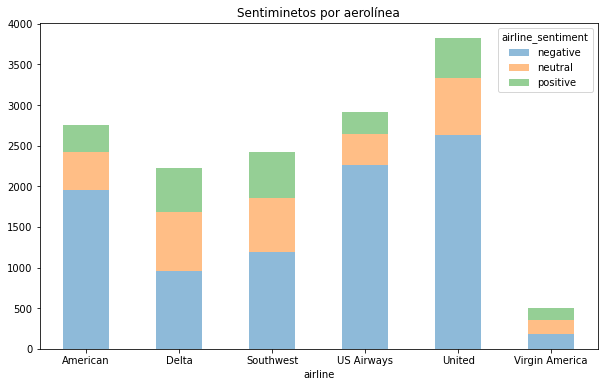

In [97]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [99]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [100]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [109]:
# Celda 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

# Definición y predicción
rf = RandomForestClassifier()
rf.fit(X_train_vectorizer, y_train)
y_pred = rf.predict(X_test_vectorizer)

# Evaluando el accuracy del modelo
accuracy_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_1:.4f}")

Accuracy: 0.7715


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [110]:
# Celda 2
#Uso de CountVectorizer, en este caso se hace uso del hiperparámetros stop_words, 
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorizer_2 = vectorizer.fit_transform(X_train)
X_test_vectorizer_2 = vectorizer.transform(X_test)

# Definición y predicción
rf = RandomForestClassifier()
rf.fit(X_train_vectorizer_2, y_train)
y_pred = rf.predict(X_test_vectorizer_2)

# Evaluando el accuracy del modelo
accuracy_2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_2:.4f}")

Accuracy: 0.7657


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [111]:
# Celda 3
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# Funcion para lematizar
def lemmatize_verbs(text):
    lemmatizer = WordNetLemmatizer()
    tokenized_text = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(token, pos='v') for token in tokenized_text])
    return lemmatized_text

X_train_v = X_train.apply(lemmatize_verbs)
X_test_v = X_test.apply(lemmatize_verbs)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_v)
X_test_vec = vectorizer.transform(X_test_v)

# Definición y predicción
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred = rf.predict(X_test_vec)

# Evaluando el accuracy del modelo
accuracy_3 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_3:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7763


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [113]:
# Celda 4
import re

# definir expresión regular para encontrar nombres de usuario en menciones del Twitt
patron_cuenta_twitter = re.compile(r'@[A-Za-z0-9_]+')
X_train_depurado = X_train.replace(patron_cuenta_twitter, '', regex=True)
X_test_depurado = X_test.replace(patron_cuenta_twitter, '', regex=True)

#X_train_v = X_train.apply(lemmatize_verbs)
#X_test_v = X_test.apply(lemmatize_verbs)

X_train_v = X_train_depurado.apply(lemmatize_verbs)
X_test_v = X_test_depurado.apply(lemmatize_verbs)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train_v)
X_test_vec = vectorizer.transform(X_test_v)

# Definición y predicción
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred = rf.predict(X_test_vec)

# Evaluando el accuracy del modelo
accuracy_4 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_4:.4f}")

Accuracy: 0.7618


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

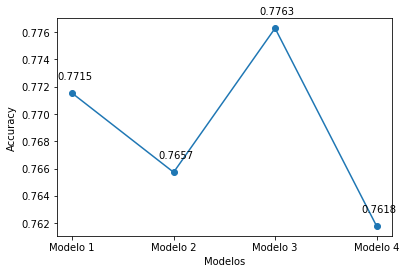

In [118]:
# Graficando resultados 

accuracy_values = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
model_names = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4']
plt.plot(model_names, accuracy_values, marker='o', linestyle='-')

# Etiquetras 
for i, v in enumerate(accuracy_values):
    plt.text(i - 0.15, v + 0.001, f"{v:.4f}")

plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.show()

## Análisis de resultados 

Los valores de accuracy para los diferentes modelos son los siguientes:

* Modelo 1 (CountVectorizer): 0.7715
* Modelo 2 (CountVectorizer + eliminación de stopwords): 0.7657
* Modelo 3 (CountVectorizer + lematización de verbos): 0.7763
* Modelo 4 (CountVectorizer + eliminación de stopwords + lematización de verbos): 0.7618

El mejor modelo fue el **Modelo 3 (CountVectorizer + lematización de verbos)** con un accuracy de **0.7763**.

Esto indica que al aplicar unicamente lematización el modelo tiene una mayor capacidad para capturar la informaicón semántica y identifique de mejor manera las palabrar relacionadas con los sentimientos de cada tweet.


El peor modelo fue el **Modelo 4 (CountVectorizer + eliminación de stopwords + lematización de verbos)** con un accuraccy de **0.7618**, alparecer aplicar varias técnicas no siempre da los mejores resultados ya que posiblemente al eliminar stop_word se quita contexto de los sentimientos expresados en cada tweet.